## About Dataset

### House Price Prediction Challenge
#### Overview
Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

## Attributes Description:

*Column*  -	Description


*POSTED_BY* - Category marking who has listed the property


*UNDER_CONSTRUCTION*	- Under Construction or Not


*RERA*	- Rera approved or Not


*BHK_NO*	- Number of Rooms


*BHKORRK*	- Type of property


*SQUARE_FT*	-  Total area of the house in square feet


*READYTOMOVE* - 	Category marking Ready to move or Not


*RESALE*	-     Category marking Resale or not


*ADDRESS*	-    Address of the property


*LONGITUDE*	- Longitude of the property


*LATITUDE*	- Latitude of the property



In [1]:
import pandas as pd
import zipfile as zf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline as make_pipeline



In [2]:
with zf.ZipFile('archive (1).zip', mode= 'r') as myzip:
    myzip.extractall()

In [3]:
df = pd.read_csv('train.csv')
df.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2                   43.0  
3                   62.5  
4                   60.5

In [4]:
df.shape

(29451, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
df.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2                   43.0  
3                   62.5  
4                   60.5

## Explore

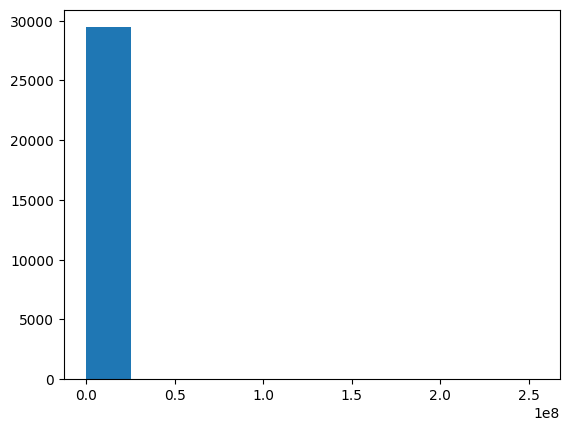

In [7]:
plt.hist(data = df, x = 'SQUARE_FT');

In [8]:
df['SQUARE_FT'].describe()

count    2.945100e+04
mean     1.980217e+04
std      1.901335e+06
min      3.000000e+00
25%      9.000211e+02
50%      1.175057e+03
75%      1.550688e+03
max      2.545455e+08
Name: SQUARE_FT, dtype: float64

In [9]:
mean = df['SQUARE_FT'].mean()
std = df['SQUARE_FT'].std()
min_ = df['SQUARE_FT'].min()
one_quantile, two_third = df['SQUARE_FT'].quantile([0.25, 0.75])
max_ = df['SQUARE_FT'].max()

In [10]:
print(f'Mean = {mean}')
print(f'Std = {std}')
print(f'Min = {min_}')
print(f'one_quantile = {one_quantile}')
print(f'two_third = {two_third}')
print(f'Max = {max_}')

Mean = 19802.170190334724
Std = 1901334.912503906
Min = 3.0
one_quantile = 900.0211296
two_third = 1550.688124
Max = 254545454.5


In [11]:
low,high = df['SQUARE_FT'].quantile([0.01,0.9])
low_high_mask  = df['SQUARE_FT'].between(low,high)

In [12]:
df[low_high_mask]

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29445     Owner                   0     0        2       BHK  1062.134891   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE                            ADDRESS  LONGITUDE  \
0                  1       1              Ksfc Layout,Bangalore  12.969910   
1                  1       1          Vishweshwara Nagar,Mysore  12.274538   
2                  1       1                   Jigani,Bangalore  12.778033   
3                  1       1        Sector-1 Vaishali,Ghaziabad  28.642300   
4                  0       1                   New Town,Kolkata  22.592200   
...              ...     ...                                ...        ...   
29445              1       1                  Tilakwadi,Belgaum  15.866670   
29447              1       1  E3-108, Lake View Recidency,,Vapi  39.945409   
29448              1       1                  Ajmer Road,Jaipur  26.928785   
29449              1       1             Sholinganallur,Chennai  12.900150   
29450              1       1                   Jagatpura,Jaipur  26.832353   

        LATITUDE  TARGET(PRICE_IN_LACS)  
0      77.597960                   55.0  
1      76.644605                   51.0  
2      77.632191                   43.0  
3      77.344500                   62.5  
4      88.484911                   60.5  
...          ...                    ...  
29445  74.500000                   40.0  
29447 -86.150721                   16.0  
29448  75.828002                   27.1  
29449  80.227910                   67.0  
29450  75.841749                   27.8  

[26214 rows x 12 columns]

In [13]:
df = df[low_high_mask]

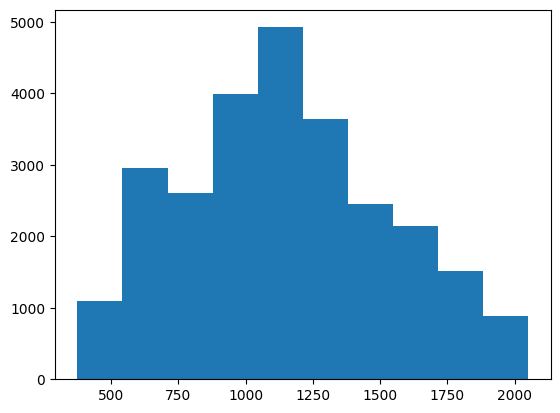

In [14]:
plt.hist(data = df, x = 'SQUARE_FT');

In [15]:
df['SQUARE_FT'].describe()

count    26214.000000
mean      1147.643783
std        382.210325
min        375.000000
25%        870.170553
50%       1122.102669
75%       1400.227275
max       2050.580998
Name: SQUARE_FT, dtype: float64

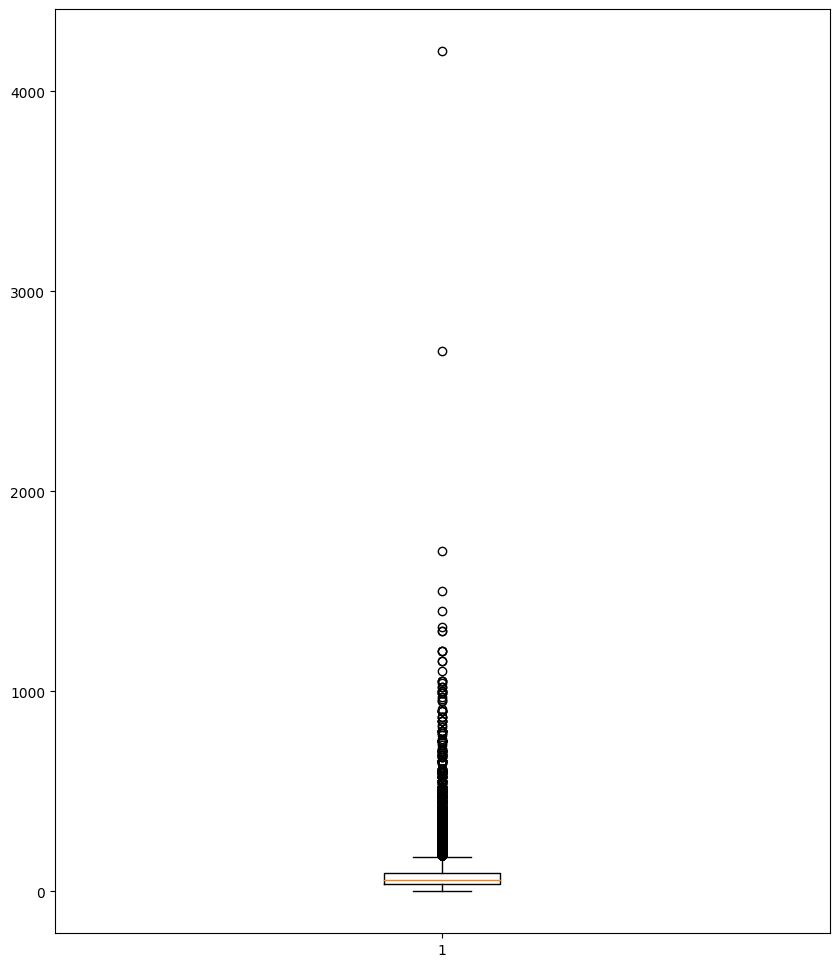

In [16]:
plt.figure(figsize = [10,12])
plt.boxplot(data= df, x = 'TARGET(PRICE_IN_LACS)');

In [17]:
df['TARGET(PRICE_IN_LACS)'].describe()

count    26214.000000
mean        79.388636
std         88.532800
min          0.250000
25%         36.000000
50%         56.900000
75%         90.000000
max       4200.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [18]:
low_price, high_price = df['TARGET(PRICE_IN_LACS)'].quantile([0.05, 0.9])
price_mask = df['TARGET(PRICE_IN_LACS)'].between(low_price, high_price)

In [19]:
df = df[price_mask]

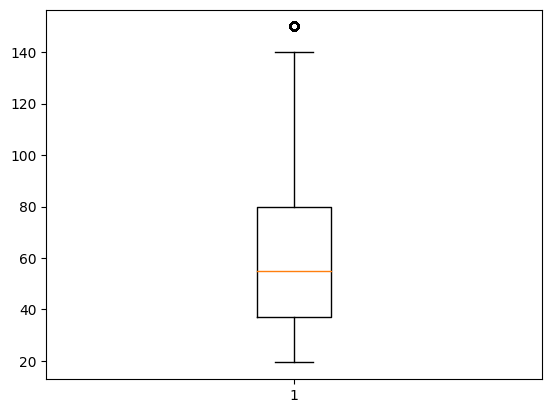

In [20]:
plt.boxplot(data= df, x = 'TARGET(PRICE_IN_LACS)');

In [21]:
df['TARGET(PRICE_IN_LACS)'].describe()

count    22376.000000
mean        61.797108
std         31.195256
min         19.400000
25%         37.000000
50%         55.000000
75%         80.000000
max        150.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

Text(0.5, 1.0, 'Price vs. Area')

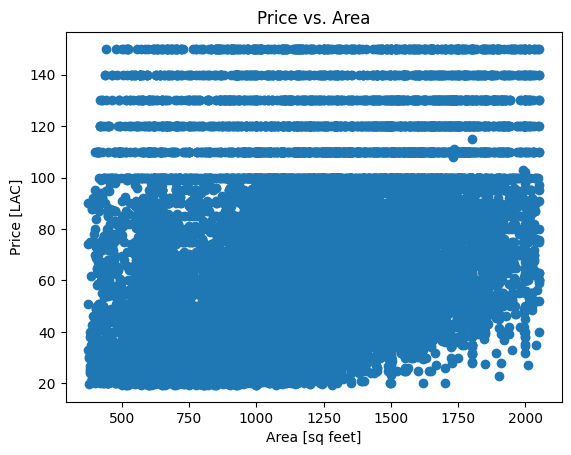

In [22]:
plt.scatter(data = df, x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)');
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [LAC]")
plt.title("Price vs. Area")


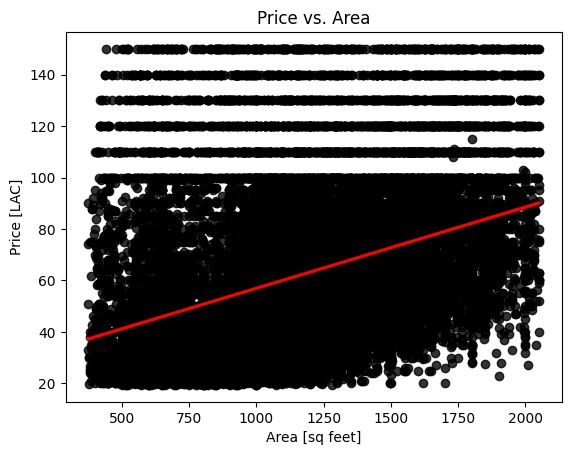

In [23]:
sb.regplot(data = df, x = 'SQUARE_FT',
            y = 'TARGET(PRICE_IN_LACS)', scatter_kws={"color": "black"},
             line_kws={"color": "red"});
plt.xlabel("Area [sq feet]")
plt.ylabel("Price [LAC]")
plt.title("Price vs. Area");


## Split

In [24]:
features = ['SQUARE_FT']
target = 'TARGET(PRICE_IN_LACS)'

In [25]:
X_train = df[features]
y_train = df[target]

In [26]:
X_train


SQUARE_FT
0      1300.236407
1      1275.000000
2       933.159722
3       929.921143
4       999.009247
...            ...
29444   752.049334
29445  1062.134891
29448  1022.641509
29449   927.079009
29450   896.774194

[22376 rows x 1 columns]

In [27]:
y_train

0         55.0
1         51.0
2         43.0
3         62.5
4         60.5
         ...  
29444    100.0
29445     40.0
29448     27.1
29449     67.0
29450     27.8
Name: TARGET(PRICE_IN_LACS), Length: 22376, dtype: float64

## Build Model


### Baseline 

In [28]:
y_mean = y_train.mean()
y_mean 

61.79710761530211

In [29]:
y_pred_baseline = [y_mean ]* len(y_train)
y_pred_baseline[:5]

[61.79710761530211,
 61.79710761530211,
 61.79710761530211,
 61.79710761530211,
 61.79710761530211]

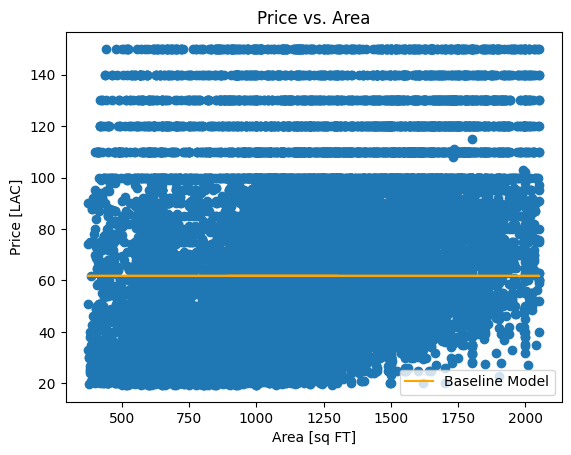

In [30]:
plt.plot(X_train['SQUARE_FT'], y_pred_baseline, color = 'orange', label = 'Baseline Model' )
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq FT]")
plt.ylabel("Price [LAC]")
plt.title("Price vs. Area")
plt.legend();

In [31]:
#calculate mean absolute error

mae_baseline = mean_absolute_error(y_train, y_pred_baseline )

print("Mean apt price", round(y_mean))
print("Baseline MAE:", round(mae_baseline))

Mean apt price 62
Baseline MAE: 25


## Iterate

In [32]:
# instantiate
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
#predicting using the model
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([66.44010941, 65.64367099, 54.85549774, 54.75329107, 56.93364981])

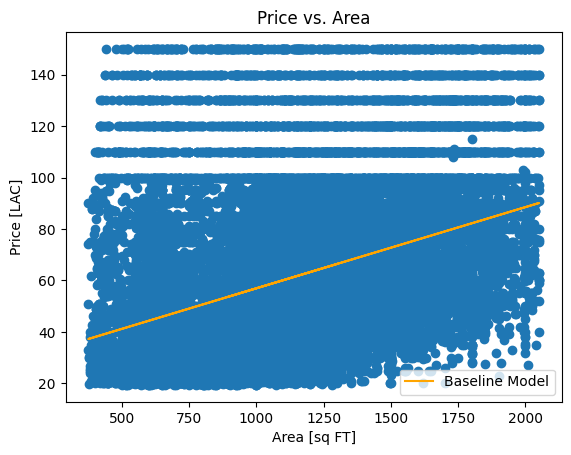

In [35]:
plt.plot(X_train['SQUARE_FT'], y_pred_training, color = 'orange', label = 'Baseline Model' )
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq FT]")
plt.ylabel("Price [LAC]")
plt.title("Price vs. Area")
plt.legend();

In [36]:
#calculate the mean absolute error for a list of predictions in scikit-learn.
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training))

Training MAE: 23


In [43]:
#import the text dataset
df_test = pd.read_csv("test.csv")
df_test.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        1       BHK   545.171340   
1    Dealer                   1     1        2       BHK   800.000000   
2    Dealer                   0     0        2       BHK  1257.096513   
3    Dealer                   0     0        3       BHK  1400.329489   
4     Owner                   0     0        1       BHK   430.477830   

   READY_TO_MOVE  RESALE             ADDRESS  LONGITUDE   LATITUDE  
0              1       1        Kamrej,Surat  21.262000  73.047700  
1              0       0     Panvel,Lalitpur  18.966114  73.148278  
2              1       1    New Town,Kolkata  22.592200  88.484911  
3              1       1  Kalwar Road,Jaipur  26.988300  75.584600  
4              1       1   Mai Mandir,Nadiad  22.700000  72.870000

In [37]:
X_test = pd.read_csv("test.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    42.610932
1    50.653096
2    65.078653
3    69.598958
4    38.991307
dtype: float64

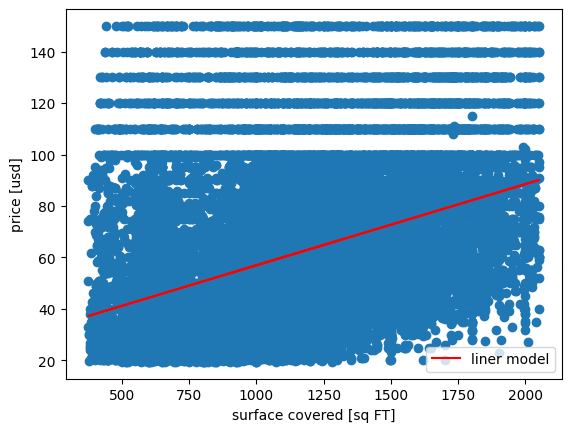

In [38]:
plt.plot(X_train['SQUARE_FT'], model.predict(X_train), color = 'r', label = 'liner model')
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq FT]")
plt.ylabel("price [usd]")
plt.legend();

## Communicating result

In [39]:
intercept = model.intercept_
print("Model Intercept:", intercept)

Model Intercept: 25.40581199959898


In [40]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "SQUARE FT":', coefficient)

Model coefficient for "SQUARE FT": 0.03


In [41]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [44]:
df_test['Price_pred'] = y_pred_test

In [45]:
df_test

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK     SQUARE_FT  \
0         Owner                   0     0        1       BHK    545.171340   
1        Dealer                   1     1        2       BHK    800.000000   
2        Dealer                   0     0        2       BHK   1257.096513   
3        Dealer                   0     0        3       BHK   1400.329489   
4         Owner                   0     0        1       BHK    430.477830   
...         ...                 ...   ...      ...       ...           ...   
68715    Dealer                   0     1        2       BHK    856.555505   
68716    Dealer                   0     1        3       BHK   2304.147465   
68717    Dealer                   1     1        1       BHK  33362.792750   
68718    Dealer                   0     0        2       BHK   1173.708920   
68719    Dealer                   0     0        3       BHK   2439.532944   

       READY_TO_MOVE  RESALE                             ADDRESS  LONGITUDE  \
0                  1       1                        Kamrej,Surat  21.262000   
1                  0       0                     Panvel,Lalitpur  18.966114   
2                  1       1                    New Town,Kolkata  22.592200   
3                  1       1                  Kalwar Road,Jaipur  26.988300   
4                  1       1                   Mai Mandir,Nadiad  22.700000   
...              ...     ...                                 ...        ...   
68715              1       1              Thane West,Maharashtra  19.180000   
68716              1       1            Sector-66A Mohali,Mohali  30.661104   
68717              0       0                  Balkum,Maharashtra  19.222101   
68718              1       1                       Hadapsar,Pune  18.496670   
68719              1       1  Hiranandani Gardens - Powai,Mumbai  19.124896   

        LATITUDE   Price_pred  
0      73.047700    42.610932  
1      73.148278    50.653096  
2      88.484911    65.078653  
3      75.584600    69.598958  
4      72.870000    38.991307  
...          ...          ...  
68715  72.963330    52.437937  
68716  76.746082    98.122644  
68717  72.988231  1078.305694  
68718  73.941670    62.447015  
68719  72.893503   102.395289  

[68720 rows x 12 columns]

# Predicting using lat and lon

### Explore

In [62]:

fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat= 'LATITUDE',
    lon= 'LONGITUDE',
    width=800,  # Width of map
    height=800,  # Height of map
    color='TARGET(PRICE_IN_LACS)',
    hover_data=['TARGET(PRICE_IN_LACS)'],  # Display price when hovering mouse over house
    color_continuous_scale=px.colors.cyclical.IceFire, 
    size_max=50, 
    zoom=10
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [63]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x='LATITUDE',
    y='LONGITUDE',
    z='TARGET(PRICE_IN_LACS)',
    labels={"LONGITUDE": "longitude", "lat": "LATITUDE", "TARGET(PRICE_IN_LACS)": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

## Split

In [66]:
features = ['LONGITUDE','LATITUDE']
target = 'TARGET(PRICE_IN_LACS)'

In [67]:
X_train = df[features]

In [68]:
y_train = df[target]

In [75]:
y_mean = y_train.mean()
y_mean

61.79710761530211

In [76]:
y_baseline_pred = [y_mean] * len(y_train)
y_baseline_pred[:5]

[61.79710761530211,
 61.79710761530211,
 61.79710761530211,
 61.79710761530211,
 61.79710761530211]

In [77]:
#calculating mean absolute error 
mae_baseline = mean_absolute_error(y_train, y_baseline_pred)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 61.8
Baseline MAE: 25.27


> we only have a slight diference between our squre_ft predictor mean_absolute_error and lat and log absolute error

## Iterate

In [ ]:
#in